In [1]:
import yfinance as yf

## Cкачиваем информацию по нескольким тикетам

In [80]:
tickers = yf.download('msft', start="2019-01-01", end="2021-01-29")
# ^ returns a named tuple of Ticker objects
tickers

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-31,101.290001,102.400002,100.440002,101.570000,99.040863,33173800
2019-01-02,99.550003,101.750000,98.940002,101.120003,98.602066,35329300
2019-01-03,100.099998,100.190002,97.199997,97.400002,94.974693,42579100
2019-01-04,99.720001,102.510002,98.930000,101.930000,99.391899,44060600
2019-01-07,101.639999,103.269997,100.980003,102.059998,99.518669,35656100
...,...,...,...,...,...,...
2021-01-22,227.080002,230.070007,225.800003,225.949997,225.949997,30124900
2021-01-25,229.119995,229.779999,224.220001,229.529999,229.529999,33152100
2021-01-26,231.860001,234.179993,230.080002,232.330002,232.330002,49169600


In [81]:
tickers.reset_index(inplace=True)

In [82]:
tickers['avg'] = (tickers['Open'] + tickers['Close'])/2

In [83]:
tickers

,Date,Open,High,Low,Close,Adj Close,Volume,avg
0,2018-12-31,101.290001,102.400002,100.440002,101.570000,99.040863,33173800,101.430000
1,2019-01-02,99.550003,101.750000,98.940002,101.120003,98.602066,35329300,100.335003
2,2019-01-03,100.099998,100.190002,97.199997,97.400002,94.974693,42579100,98.750000
3,2019-01-04,99.720001,102.510002,98.930000,101.930000,99.391899,44060600,100.825001
4,2019-01-07,101.639999,103.269997,100.980003,102.059998,99.518669,35656100,101.849998
...,...,...,...,...,...,...,...,...
519,2021-01-22,227.080002,230.070007,225.800003,225.949997,225.949997,30124900,226.514999
520,2021-01-25,229.119995,229.779999,224.220001,229.529999,229.529999,33152100,229.324997
521,2021-01-26,231.860001,234.179993,230.080002,232.330002,232.330002,49169600,232.095001
522,2021-01-27,238.000000,240.440002,230.139999,232.899994,232.899994,69870600,235.449997


In [84]:
tickers[['Date', 'avg']]

,Date,avg
0,2018-12-31,101.430000
1,2019-01-02,100.335003
2,2019-01-03,98.750000
3,2019-01-04,100.825001
4,2019-01-07,101.849998
...,...,...
519,2021-01-22,226.514999
520,2021-01-25,229.324997
521,2021-01-26,232.095001
522,2021-01-27,235.449997


In [85]:
train=tickers.iloc[:450,:]
test=tickers.iloc[451:523]
test

,Date,Open,High,Low,Close,Adj Close,Volume,avg
451,2020-10-14,223.000000,224.220001,219.130005,220.860001,220.283279,23451700,221.930000
452,2020-10-15,217.100006,220.360001,216.009995,219.660004,219.086426,22733100,218.380005
453,2020-10-16,220.149994,222.289993,219.320007,219.660004,219.086426,26057900,219.904999
454,2020-10-19,220.419998,222.300003,213.720001,214.220001,213.660629,27625800,217.320000
455,2020-10-20,215.800003,217.369995,213.089996,214.649994,214.089493,22753500,215.224998
...,...,...,...,...,...,...,...,...
518,2021-01-21,224.699997,226.300003,222.419998,224.970001,224.970001,30749600,224.834999
519,2021-01-22,227.080002,230.070007,225.800003,225.949997,225.949997,30124900,226.514999
520,2021-01-25,229.119995,229.779999,224.220001,229.529999,229.529999,33152100,229.324997
521,2021-01-26,231.860001,234.179993,230.080002,232.330002,232.330002,49169600,232.095001


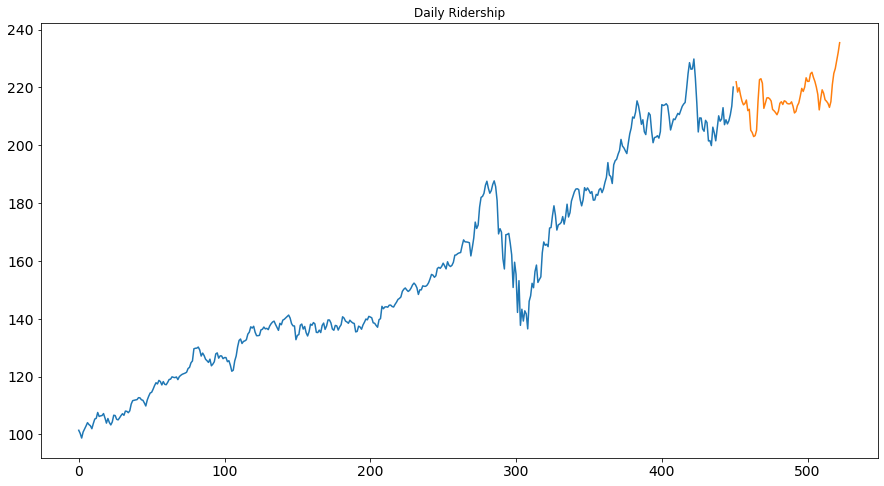

In [86]:
train.avg.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14)
test.avg.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14)
plt.show()


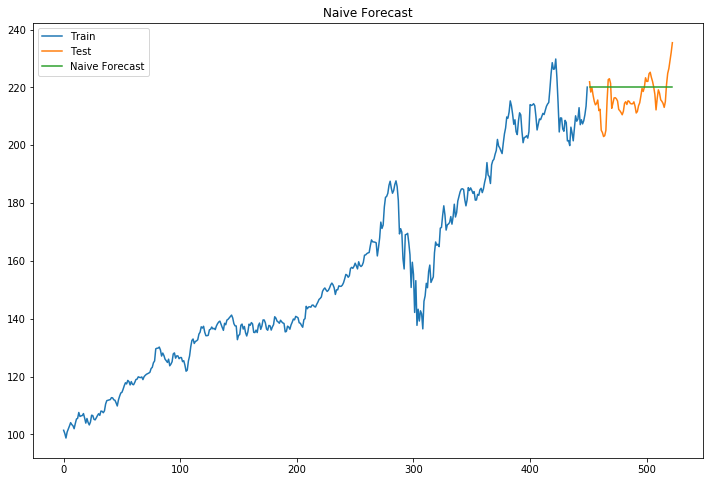

In [87]:
dd= np.asarray(train.avg)
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(train.index, train['avg'], label='Train')
plt.plot(test.index,test['avg'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

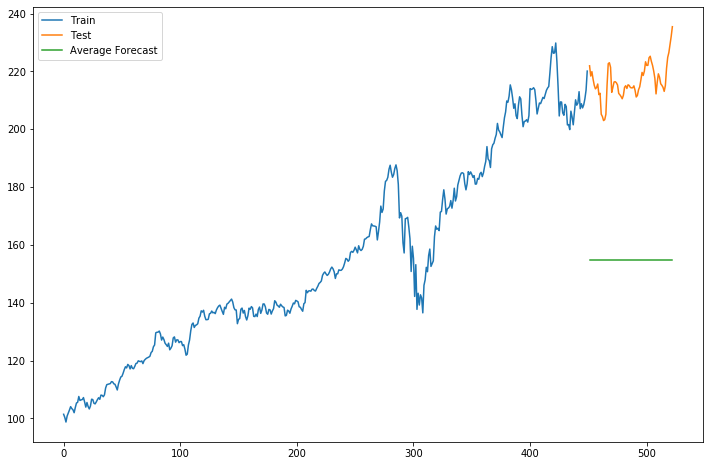

In [88]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['avg'].mean()
plt.figure(figsize=(12,8))
plt.plot(train['avg'], label='Train')
plt.plot(test['avg'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

In [91]:
y_hat_avg = test.copy()
fit1=sm.tsa.statespace.SARIMAX(train.avg, order=(2, 1, 4),seasonal_order=(0,1,1,7)).fit()
y_hat_avg['SARIMA'] = fit1.predict(start="20201-01-01", end="2021-01-29", dynamic=True)
plt.figure(figsize=(16,8))
plt.plot( train['avg'], label='Train')
plt.plot(test['avg'], label='Test')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

In [60]:
tickers[['Date', 'avg']].set_index('Date').plot()

KeyError: "['Date'] not in index"

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA
from matplotlib import pylab as plt

In [8]:
tda=tickers[['Date', 'avg']]

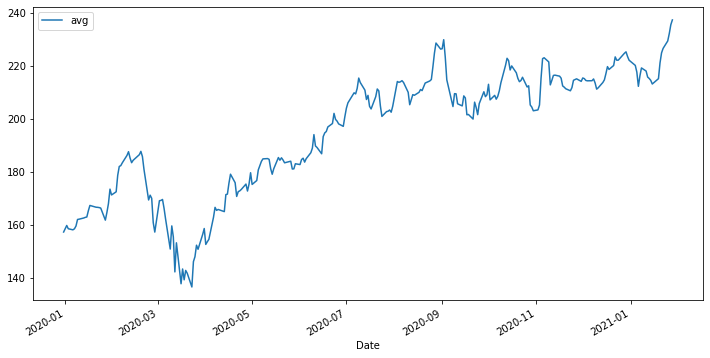

In [9]:
tda.set_index('Date').plot(figsize=(12,6))

,avg
count,272.000000
mean,194.711140
std,23.456664
min,136.494995
25%,175.583748
50%,203.294998
75%,213.977499
max,237.269997


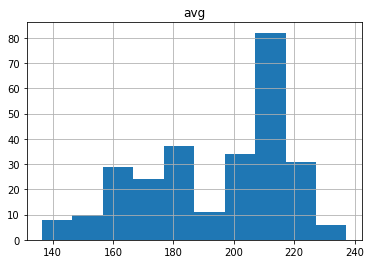

In [10]:
itog = tda.describe()
tda.hist()
itog

In [11]:
type(itog)

pandas.core.frame.DataFrame

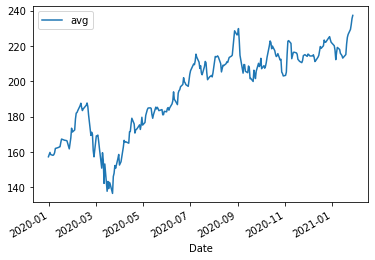

In [12]:
tickers[['Date', 'avg']].set_index('Date').plot()

In [14]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(train.Count).plot()
result = sm.tsa.stattools.adfuller(train.Count)
plt.show()

NameError: name 'train' is not defined

## Cкачиваем информацию по тикету

In [8]:
msft = yf.Ticker("MSFT")

## Ну и погнали смотреть что тут есть

In [9]:
msft.info

{'zip': '98052-6399',
 'sector': 'Technology',
 'fullTimeEmployees': 163000,
 'longBusinessSummary': 'Microsoft Corporation develops, licenses, and supports software, services, devices, and solutions worldwide. Its Productivity and Business Processes segment offers Office, Exchange, SharePoint, Microsoft Teams, Office 365 Security and Compliance, and Skype for Business, as well as related Client Access Licenses (CAL); Skype, Outlook.com, OneDrive, and LinkedIn; and Dynamics 365, a set of cloud-based and on-premises business solutions for small and medium businesses, large organizations, and divisions of enterprises. Its Intelligent Cloud segment licenses SQL and Windows Servers, Visual Studio, System Center, and related CALs; GitHub that provides a collaboration platform and code hosting service for developers; and Azure, a cloud platform. It also offers support services and Microsoft consulting services to assist customers in developing, deploying, and managing Microsoft server and de

In [10]:
hist = msft.history(period="max")

In [11]:
msft.actions

,Dividends,Stock Splits
Date,,
1987-09-21,0.00,2.0
1990-04-16,0.00,2.0
1991-06-27,0.00,1.5
1992-06-15,0.00,1.5
1994-05-23,0.00,2.0
...,...,...
2019-11-20,0.51,0.0
2020-02-19,0.51,0.0
2020-05-20,0.51,0.0


In [12]:
msft.dividends

Date
2003-02-19    0.08
2003-10-15    0.16
2004-08-23    0.08
2004-11-15    3.08
2005-02-15    0.08
              ... 
2019-11-20    0.51
2020-02-19    0.51
2020-05-20    0.51
2020-08-19    0.51
2020-11-18    0.56
Name: Dividends, Length: 68, dtype: float64

In [13]:
msft.splits

Date
1987-09-21    2.0
1990-04-16    2.0
1991-06-27    1.5
1992-06-15    1.5
1994-05-23    2.0
1996-12-09    2.0
1998-02-23    2.0
1999-03-29    2.0
2003-02-18    2.0
Name: Stock Splits, dtype: float64

In [17]:
msft.financials

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [18]:
msft.quarterly_financials

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [15]:
msft.major_holders

,0,1
0,0.06%,% of Shares Held by All Insider
1,71.84%,% of Shares Held by Institutions
2,71.89%,% of Float Held by Institutions
3,4849,Number of Institutions Holding Shares


In [16]:
msft.institutional_holders

,Holder,Shares,Date Reported,% Out,Value
0,"Vanguard Group, Inc. (The)",622689597,2020-09-29,0.0826,130970302937
1,Blackrock Inc.,516065148,2020-09-29,0.0684,108543982578
2,State Street Corporation,309004107,2020-09-29,0.0410,64992833825
3,"FMR, LLC",236747226,2020-09-29,0.0314,49795044044
4,Price (T.Rowe) Associates Inc,180419808,2020-09-29,0.0239,37947698216
5,"Geode Capital Management, LLC",116538073,2020-09-29,0.0155,24511452894
6,Capital World Investors,111872823,2020-09-29,0.0148,23530210861
7,Capital International Investors,94601027,2020-09-29,0.0125,19897434008
8,Capital Research Global Investors,94009486,2020-09-29,0.0125,19773015190
9,Northern Trust Corporation,93421404,2020-09-29,0.0124,19649323903


In [20]:
msft.balance_sheet
msft.quarterly_balance_sheet

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [21]:
msft.cashflow
msft.quarterly_cashflow

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [22]:
msft.earnings
msft.quarterly_earnings

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [23]:
msft.sustainability

,Value
2021-1,
palmOil,False
controversialWeapons,False
gambling,False
socialScore,9.37
nuclear,False
furLeather,False
alcoholic,False
gmo,False
catholic,False


In [24]:
msft.recommendations

,Firm,To Grade,From Grade,Action
Date,,,,
2012-03-16 08:19:00,Argus Research,Buy,,up
2012-03-19 14:00:00,Hilliard Lyons,Long-Term Buy,,main
2012-03-22 07:03:00,Morgan Stanley,Overweight,,main
2012-04-03 11:53:00,UBS,Buy,,main
2012-04-20 06:18:00,Deutsche Bank,Buy,,main
...,...,...,...,...
2021-01-27 17:29:16,BMO Capital,Outperform,,main
2021-01-27 17:31:51,Barclays,Overweight,,main
2021-01-27 17:36:43,Oppenheimer,Outperform,,main


In [25]:
msft.calendar

,0,1
Earnings Date,2021-04-27 00:00:00,2021-05-03 00:00:00
Earnings Average,1.77,1.77
Earnings Low,1.69,1.69
Earnings High,1.93,1.93
Revenue Average,40956400000,40956400000
Revenue Low,38840000000,38840000000
Revenue High,41894000000,41894000000


In [26]:
# show ISIN code - *experimental*
# ISIN = International Securities Identification Number
msft.isin

'US5949181045'

In [27]:
msft.options

('2021-02-05',
 '2021-02-12',
 '2021-02-19',
 '2021-02-26',
 '2021-03-05',
 '2021-03-19',
 '2021-04-16',
 '2021-06-18',
 '2021-07-16',
 '2021-09-17',
 '2022-01-21',
 '2022-03-18',
 '2022-06-17',
 '2022-09-16',
 '2023-01-20',
 '2023-03-17')

In [31]:
# get option chain for specific expiration
opt = msft.option_chain(msft.options[-1])
# data available via: opt.calls, opt.puts

In [30]:
opt.calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,MSFT230317C00110000,2021-01-28 20:30:33,110.0,129.55,122.00,126.50,-1.449997,-1.106868,11,55,0.405432,True,REGULAR,USD
1,MSFT230317C00115000,2021-01-27 20:40:59,115.0,119.40,117.50,122.00,0.000000,0.000000,2,7,0.396796,True,REGULAR,USD
2,MSFT230317C00120000,2021-01-27 20:09:00,120.0,115.00,113.00,118.00,0.000000,0.000000,3,5,0.398016,True,REGULAR,USD
3,MSFT230317C00125000,2021-01-28 14:39:20,125.0,112.90,109.00,113.50,0.000000,0.000000,1,1,0.387762,True,REGULAR,USD
4,MSFT230317C00130000,2021-01-28 14:43:15,130.0,111.10,105.00,109.50,0.000000,0.000000,5,5,0.386084,True,REGULAR,USD
5,MSFT230317C00135000,2021-01-27 18:42:13,135.0,106.30,102.00,105.50,1.300003,1.238098,2,10,0.383032,True,REGULAR,USD
6,MSFT230317C00140000,2021-01-22 15:15:02,140.0,95.17,97.80,101.50,0.000000,0.000000,1,4,0.378882,True,REGULAR,USD
7,MSFT230317C00145000,2021-01-22 15:15:02,145.0,99.00,93.60,97.50,7.830002,8.588353,1,2,0.373786,True,REGULAR,USD
8,MSFT230317C00150000,2021-01-28 19:41:06,150.0,94.70,90.10,94.00,-4.900002,-4.919680,6,28,0.374548,True,REGULAR,USD
9,MSFT230317C00155000,2021-01-29 19:18:35,155.0,89.50,86.00,90.00,4.500000,5.294118,5,26,0.367713,True,REGULAR,USD


In [32]:
opt.puts

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,MSFT230317P00110000,2021-01-29 14:35:58,110.0,3.76,3.60,4.75,0.410000,12.238809,72.0,332,0.411200,False,REGULAR,USD
1,MSFT230317P00115000,2021-01-29 14:30:45,115.0,5.11,4.25,6.05,0.790000,18.287035,32.0,85,0.419592,False,REGULAR,USD
2,MSFT230317P00120000,2021-01-28 20:47:14,120.0,5.08,4.80,8.15,0.140000,2.834005,1.0,4,0.439367,False,REGULAR,USD
3,MSFT230317P00125000,2021-01-27 20:59:43,125.0,5.60,5.60,6.50,0.000000,0.000000,7.0,7,0.387488,False,REGULAR,USD
4,MSFT230317P00130000,2021-01-25 17:43:33,130.0,7.11,6.20,7.55,0.970000,15.798050,1.0,4,0.386755,False,REGULAR,USD
5,MSFT230317P00140000,2021-01-19 16:47:42,140.0,9.10,6.70,10.95,0.000000,0.000000,4.0,5,0.400122,False,REGULAR,USD
6,MSFT230317P00145000,2021-01-19 17:05:33,145.0,9.65,8.70,12.45,0.000000,0.000000,NaN,10,0.400580,False,REGULAR,USD
7,MSFT230317P00150000,2021-01-29 18:44:35,150.0,11.17,8.70,12.50,1.000000,9.832842,4.0,33,0.380988,False,REGULAR,USD
8,MSFT230317P00160000,2021-01-28 18:58:23,160.0,11.15,12.45,14.00,0.000000,0.000000,2.0,19,0.360251,False,REGULAR,USD
9,MSFT230317P00165000,2021-01-25 17:18:31,165.0,14.50,13.80,16.55,0.000000,0.000000,2.0,13,0.369818,False,REGULAR,USD


# А еще можно вот так работать с тикетами

In [34]:
tickers = yf.Tickers('msft aapl goog')
# ^ returns a named tuple of Ticker objects
tickers

yfinance.Tickers object <MSFT,AAPL,GOOG>

In [35]:
# access each ticker using (example)
tickers.tickers.MSFT.info

{'zip': '98052-6399',
 'sector': 'Technology',
 'fullTimeEmployees': 163000,
 'longBusinessSummary': 'Microsoft Corporation develops, licenses, and supports software, services, devices, and solutions worldwide. Its Productivity and Business Processes segment offers Office, Exchange, SharePoint, Microsoft Teams, Office 365 Security and Compliance, and Skype for Business, as well as related Client Access Licenses (CAL); Skype, Outlook.com, OneDrive, and LinkedIn; and Dynamics 365, a set of cloud-based and on-premises business solutions for small and medium businesses, large organizations, and divisions of enterprises. Its Intelligent Cloud segment licenses SQL and Windows Servers, Visual Studio, System Center, and related CALs; GitHub that provides a collaboration platform and code hosting service for developers; and Azure, a cloud platform. It also offers support services and Microsoft consulting services to assist customers in developing, deploying, and managing Microsoft server and de

In [36]:
tickers.tickers.AAPL.history(period="1mo")

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-12-30,135.580002,135.990005,133.399994,133.720001,96452100,0,0
2020-12-31,134.080002,134.740005,131.720001,132.690002,98990400,0,0
2021-01-04,133.520004,133.610001,126.760002,129.410004,143301900,0,0
2021-01-05,128.889999,131.740005,128.429993,131.009995,97664900,0,0
2021-01-06,127.720001,131.050003,126.379997,126.599998,155088000,0,0
2021-01-07,128.360001,131.630005,127.860001,130.919998,109578200,0,0
2021-01-08,132.429993,132.630005,130.229996,132.050003,104965400,0,0
2021-01-11,129.190002,130.169998,128.500000,128.979996,100620900,0,0
2021-01-12,128.500000,129.690002,126.860001,128.800003,91951100,0,0


In [37]:
tickers.tickers.GOOG.actions

,Dividends,Stock Splits
Date,,
2014-03-27,0.0,2.002000
2015-04-27,0.0,1.002746
